In [136]:
import pandas as pd

In [137]:
import matplotlib.pyplot as plt

In [138]:
import snorkel

In [139]:
from snorkel.labeling import labeling_function

## Reading the data

In [140]:
#readin the curb_fp.csv file
curb_fp = pd.read_csv('data/curb_fp.csv')
curb_fp

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,...,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,geometry
0,18927,85882,CurbRamp,1.0,NaN,False,yLFcq-aaf-Ag_iITWsAWnQ,0,0,0,...,720,480,169,141,1,34.671875,-24.8750,90.021843,1.101685,POINT (1275705.9782665605 214304.255489019)
1,19027,86190,CurbRamp,1.0,1.0,False,4vGkAd8TMCx4FgyoDV7Pmw,1,0,0,...,720,480,305,283,1,270.000000,-10.0000,90.147316,-9.087791,POINT (1261597.9105232325 237078.0516430551)
2,19143,86478,CurbRamp,1.0,NaN,False,JXW_FToo2iFIB0NslFrCeg,0,0,0,...,720,480,193,153,1,195.500000,-17.8750,350.722260,2.929657,POINT (1272276.4832222403 258029.08524980946)
3,19411,86767,CurbRamp,1.0,NaN,False,Z1u8iq5TEuS8-n_kZKRc8A,0,0,0,...,720,480,526,315,1,174.437500,-5.8750,156.979935,-0.590858,POINT (1283388.097714087 258754.43556004378)
4,19411,86768,CurbRamp,1.0,1.0,False,Z1u8iq5TEuS8-n_kZKRc8A,1,0,0,...,720,480,285,212,1,128.500000,-13.0000,156.979935,-0.590858,POINT (1283444.4740236972 258754.76484089182)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,18558,84922,CurbRamp,NaN,NaN,False,-B8963iDbur4NYIYzdTJXA,0,0,0,...,720,480,505,230,1,324.500000,-17.8125,220.064758,-4.507965,POINT (1269212.1309289748 227124.1054278093)
10761,75784,230293,CurbRamp,1.0,NaN,True,3KIM9a467DImsFzpQ9xAqQ,0,0,0,...,720,480,449,120,3,169.227676,-15.8750,22.459303,2.169060,POINT (1280570.7039149986 206540.29524511957)
10762,76193,231338,CurbRamp,1.0,NaN,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,...,720,480,267,187,1,253.562500,-35.0000,177.959915,-0.962440,POINT (1282827.7064719573 208828.7977988457)
10763,76193,231339,CurbRamp,1.0,NaN,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,...,720,480,516,171,1,110.312500,-35.0000,179.365723,-1.093400,POINT (1282862.9675030417 208900.50316090064)


In [141]:
#put curb_fp[label_id] into a list
curb_fp_ids = curb_fp['label_id'].tolist()

In [142]:
labels = pd.read_csv('data/labels.csv')

In [143]:
labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,...,zoom,heading,pitch,photographer_heading,photographer_pitch,geometry,label_tags,label_description,heading_diff,pitch_diff
0,18604,85055,CurbRamp,1.0,NaN,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,...,1,107.750000,-15.62500,270.556610,0.907036,POINT (-122.3327865600586 47.61859893798828),0.0,0.0,-162.806610,-16.532036
1,18608,85057,Obstacle,2.0,1.0,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,...,1,38.375000,-21.87500,164.133438,0.335564,POINT (-122.3318862915039 47.61780548095703),0.0,0.0,-125.758438,-22.210564
2,18608,85059,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,1,131.187500,-24.50000,164.133438,0.335564,POINT (-122.33183288574219 47.61751174926758),0.0,0.0,-32.945938,-24.835564
3,18608,85060,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,1,131.187500,-24.50000,164.133438,0.335564,POINT (-122.33187866210938 47.61751937866211),0.0,0.0,-32.945938,-24.835564
4,18608,85062,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,1,257.187500,-35.00000,164.133438,0.335564,POINT (-122.33204650878906 47.617637634277344),0.0,0.0,93.054062,-35.335564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,76181,231270,CurbRamp,1.0,NaN,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,...,1,332.468750,-35.00000,215.130295,-0.157570,POINT (-122.26725769042969 47.540771484375),0.0,0.0,117.338455,-34.842430
195539,76183,231285,NoSidewalk,5.0,NaN,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,...,3,0.890625,-11.65625,179.161057,-5.825714,POINT (-122.26344299316406 47.55229187011719),0.0,0.0,-178.270432,-5.830536
195540,76193,231338,CurbRamp,1.0,NaN,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,...,1,253.562500,-35.00000,177.959915,-0.962440,POINT (-122.28179168701172 47.563270568847656),0.0,0.0,75.602585,-34.037560
195541,76193,231339,CurbRamp,1.0,NaN,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,...,1,110.312500,-35.00000,179.365723,-1.093400,POINT (-122.28165435791016 47.56346893310547),0.0,0.0,-69.053223,-33.906600


## Labeling functions based on heuristics

In [144]:
# Define the label mappings for convenience
NOT_SURE = -1
WRONG = 0
CORRECT = 1

### intersection

In [185]:
#check if it is in the curb false positive list
@labeling_function()
def intersection(x):
    # x in this case is a row of the dataframe
    return WRONG if x["label_id"] in curb_fp_ids else NOT_SURE

In [146]:
#check if it is in the curb false positive list
@labeling_function()
def severity(x):
    # x in this case is a row of the dataframe
    return CORRECT if x["severity"] == 5 else NOT_SURE

### gsv

In [147]:
#check if the user zoomed in
@labeling_function()
def zoom(x):
    # x in this case is a row of the dataframe
    return CORRECT if x["zoom"] > 1 else NOT_SURE

In [201]:
#check if the user changed the heading
@labeling_function()
def heading(x):
    # x in this case is a row of the dataframe
    return CORRECT if abs(x['heading_diff'])  >= 100 else NOT_SURE

In [202]:
#check if the user changed the pitch
@labeling_function()
def pitch(x):
    # x in this case is a row of the dataframe
    return CORRECT if abs(x['pitch_diff'])  >= 20 else NOT_SURE

### optional input

In [150]:
#check if the user has put a tag
@labeling_function()
def tags(x):
    # x in this case is a row of the dataframe
    return CORRECT if x['label_tags']  == 1 else NOT_SURE

In [151]:
#check if the user has put a tag
@labeling_function()
def description(x):
    # x in this case is a row of the dataframe
    return CORRECT if x['label_description']  == 1 else NOT_SURE

In [203]:
lfs = [
    intersection, 
    zoom, 
    tags, 
    description,
    severity,
    pitch,
    heading]

In [153]:
from snorkel.labeling import PandasLFApplier

In [204]:
applier = PandasLFApplier(lfs=lfs)

In [155]:
#read in the labels.csv file
df_train = pd.read_csv('data/labels.csv')

In [58]:
#select the label type == CurbRamp
#df_train = df_train[df_train['label_type'] == 'CurbRamp']

In [156]:
# read in gt.csv file
df_test = pd.read_csv('data/gt_2.csv')


In [157]:
df_test

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,...,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,verified
0,19418,86788,SurfaceProblem,2.0,1.0,False,BpVD1H9f1A6URlrjPUcyZg,2,0,0,...,183.062500,-7.125000,358.678406,6.516869,0.0,0.0,-175.615906,-13.641869,POINT (-122.28125 47.698307037353516),1
1,21038,91037,CurbRamp,NaN,1.0,True,g0kskJSQVRkZXwH8mmA3gA,1,0,0,...,34.062500,-35.000000,99.724670,-2.702782,0.0,0.0,-65.662170,-32.297218,POINT (-122.31624603271484 47.55794906616211),1
2,22195,93842,CurbRamp,1.0,1.0,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,0,...,175.187500,-19.250000,299.396454,2.216354,0.0,0.0,-124.208954,-21.466354,POINT (-122.32888793945312 47.5999755859375),1
3,47238,190528,CurbRamp,1.0,1.0,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,0,...,31.437500,-16.187500,132.761383,-1.222160,0.0,0.0,-101.323883,-14.965340,POINT (-122.3386001586914 47.6960334777832),1
4,47291,190672,CurbRamp,1.0,1.0,True,00WCIfeoGC33NDp8s0_KGg,1,0,0,...,335.875000,-15.803572,180.815201,0.315163,0.0,0.0,155.059799,-16.118734,POINT (-122.28343200683594 47.546104431152344),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16575,14016,65281,SurfaceProblem,3.0,0.0,True,5TVU8BDY3ZtYnRwYnLkFjw,0,1,0,...,49.455357,-17.437500,359.584869,0.085213,0.0,0.0,-310.129513,-17.522713,POINT (-122.32270050048828 47.532718658447266),0
16576,16930,79862,SurfaceProblem,5.0,0.0,True,Tgdv_crZ2G73pDZs8Xo81w,0,2,0,...,295.883942,-15.598214,271.188171,-3.895775,0.0,0.0,24.695770,-11.702439,POINT (-122.33906555175781 47.701438903808594),0
16577,16933,79880,SurfaceProblem,NaN,NaN,True,D5wUl-EWRUD5bl8H1fDd-Q,1,1,0,...,289.812500,-10.892858,269.897766,-1.949219,1.0,0.0,19.914734,-8.943639,POINT (-122.34080505371094 47.70146179199219),0
16578,16933,79882,SurfaceProblem,5.0,NaN,True,D5wUl-EWRUD5bl8H1fDd-Q,1,1,0,...,331.508942,-29.910715,269.897766,-1.949219,1.0,1.0,61.611176,-27.961496,POINT (-122.34072875976562 47.70145797729492),0


In [205]:
L_train = applier.apply(df=df_train)
L_test = applier.apply(df=df_test)

100%|██████████| 16580/16580 [00:01<00:00, 8913.97it/s]


In [25]:
from snorkel.labeling import LFAnalysis

In [206]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
intersection,0,[0],0.055052,0.049784,0.049784
zoom,1,[1],0.381727,0.280133,0.017740
tags,2,[1],0.077027,0.076208,0.000041
description,3,[1],0.001125,0.001115,0.000005
severity,4,[1],0.153117,0.142444,0.000220
pitch,5,[1],0.523742,0.378469,0.030500
heading,6,[1],0.520862,0.434902,0.028684


In [182]:
from snorkel.labeling.model import MajorityLabelVoter

majority_model = MajorityLabelVoter()
preds_train = majority_model.predict(L=L_train)

In [207]:
from snorkel.labeling.model import LabelModel

label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train=L_train, n_epochs=500, log_freq=100, seed=123)

INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|          | 0/500 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=0.273]
INFO:root:[100 epochs]: TRAIN:[loss=0.016]
INFO:root:[200 epochs]: TRAIN:[loss=0.014]
 58%|█████▊    | 292/500 [00:00<00:00, 2916.56epoch/s]INFO:root:[300 epochs]: TRAIN:[loss=0.009]
INFO:root:[400 epochs]: TRAIN:[loss=0.008]
100%|██████████| 500/500 [00:00<00:00, 3052.77epoch/s]
INFO:root:Finished Training


In [208]:
majority_acc = majority_model.score(L=L_test, Y=Y_test, tie_break_policy="random")[
    "accuracy"
]
print(f"{'Majority Vote Accuracy:':<25} {majority_acc * 100:.1f}%")

label_model_acc = label_model.score(L=L_test, Y=Y_test, tie_break_policy="random")[
    "accuracy"
]
print(f"{'Label Model Accuracy:':<25} {label_model_acc * 100:.1f}%")

Majority Vote Accuracy:   76.4%
Label Model Accuracy:     51.0%


In [171]:
df_test[df_test['verified']==1]

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,...,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,verified
0,19418,86788,SurfaceProblem,2.0,1.0,False,BpVD1H9f1A6URlrjPUcyZg,2,0,0,...,183.062500,-7.125000,358.678406,6.516869,0.0,0.0,-175.615906,-13.641869,POINT (-122.28125 47.698307037353516),1
1,21038,91037,CurbRamp,NaN,1.0,True,g0kskJSQVRkZXwH8mmA3gA,1,0,0,...,34.062500,-35.000000,99.724670,-2.702782,0.0,0.0,-65.662170,-32.297218,POINT (-122.31624603271484 47.55794906616211),1
2,22195,93842,CurbRamp,1.0,1.0,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,0,...,175.187500,-19.250000,299.396454,2.216354,0.0,0.0,-124.208954,-21.466354,POINT (-122.32888793945312 47.5999755859375),1
3,47238,190528,CurbRamp,1.0,1.0,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,0,...,31.437500,-16.187500,132.761383,-1.222160,0.0,0.0,-101.323883,-14.965340,POINT (-122.3386001586914 47.6960334777832),1
4,47291,190672,CurbRamp,1.0,1.0,True,00WCIfeoGC33NDp8s0_KGg,1,0,0,...,335.875000,-15.803572,180.815201,0.315163,0.0,0.0,155.059799,-16.118734,POINT (-122.28343200683594 47.546104431152344),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12862,16991,80049,CurbRamp,1.0,1.0,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,...,94.750000,-18.437500,178.104111,2.727684,0.0,0.0,-83.354111,-21.165184,POINT (-122.28788757324219 47.527854919433594),1
12863,16991,80051,CurbRamp,1.0,1.0,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,...,13.187500,-8.375000,178.104111,2.727684,0.0,0.0,-164.916611,-11.102684,POINT (-122.28797149658203 47.527957916259766),1
12864,17700,82303,CurbRamp,3.0,NaN,True,eYuHkS8M4C_6rWOXE1MAOw,1,1,0,...,190.875000,-31.625000,75.978729,-1.196411,0.0,0.0,114.896271,-30.428589,POINT (-122.29849243164062 47.54031753540039),1
12865,18083,83398,CurbRamp,NaN,1.0,False,9HbBPwLAbnJ57f3Iv0Sl9A,1,0,0,...,93.035713,-17.678572,201.913620,0.383842,0.0,0.0,-108.877907,-18.062414,POINT (-122.3752212524414 47.530181884765625),1


In [133]:
df_train

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,...,zoom,heading,pitch,photographer_heading,photographer_pitch,geometry,label_tags,label_description,heading_diff,pitch_diff
0,18604,85055,CurbRamp,1.0,NaN,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,...,1,107.75000,-15.625000,270.556610,0.907036,POINT (-122.3327865600586 47.61859893798828),0.0,0.0,-162.806610,-16.532036
2,18608,85059,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,1,131.18750,-24.500000,164.133438,0.335564,POINT (-122.33183288574219 47.61751174926758),0.0,0.0,-32.945938,-24.835564
3,18608,85060,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,1,131.18750,-24.500000,164.133438,0.335564,POINT (-122.33187866210938 47.61751937866211),0.0,0.0,-32.945938,-24.835564
4,18608,85062,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,...,1,257.18750,-35.000000,164.133438,0.335564,POINT (-122.33204650878906 47.617637634277344),0.0,0.0,93.054062,-35.335564
5,18611,85068,CurbRamp,1.0,NaN,False,qzzOihXh8f6fpAKK9ttmUQ,0,0,0,...,1,240.31250,-28.437500,220.271088,-0.452202,POINT (-122.3329086303711 47.616973876953125),0.0,0.0,20.041412,-27.985298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195530,76118,231222,CurbRamp,1.0,NaN,True,gMZCijQWYviUCG588WlFTw,0,0,0,...,2,354.84375,-25.977678,52.083549,-0.176730,POINT (-122.26596069335938 47.55414962768555),0.0,0.0,302.760201,-25.800948
195538,76181,231270,CurbRamp,1.0,NaN,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,...,1,332.46875,-35.000000,215.130295,-0.157570,POINT (-122.26725769042969 47.540771484375),0.0,0.0,117.338455,-34.842430
195540,76193,231338,CurbRamp,1.0,NaN,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,...,1,253.56250,-35.000000,177.959915,-0.962440,POINT (-122.28179168701172 47.563270568847656),0.0,0.0,75.602585,-34.037560
195541,76193,231339,CurbRamp,1.0,NaN,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,...,1,110.31250,-35.000000,179.365723,-1.093400,POINT (-122.28165435791016 47.56346893310547),0.0,0.0,-69.053223,-33.906600


In [127]:
import seaborn as sns

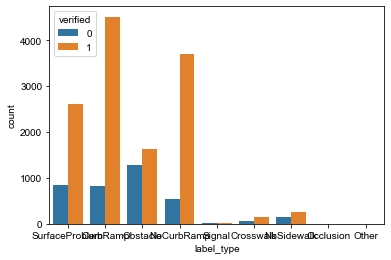

In [214]:
# plot the label tyle and verified value, wide plot
sns.countplot(x='label_type', hue='verified', data=df_test)
# set the size of the plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [106]:
Y_test = df_test.verified.values